문제 1-1. VGG16 모델 구현하기

In [26]:
# 모듈 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
train_dir = os.path.join('Data', 'cats_and_dogs_filtered', 'train')
validation_dir = os.path.join('Data', 'cats_and_dogs_filtered', 'validation')

# 훈련 및 검증 데이터 경로 설정
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 데이터 개수 확인
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print('total training images:', total_train)
print('total validation images:', total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total training images: 2000
total validation images: 1000


Found 2000 images belonging to 2 classes.


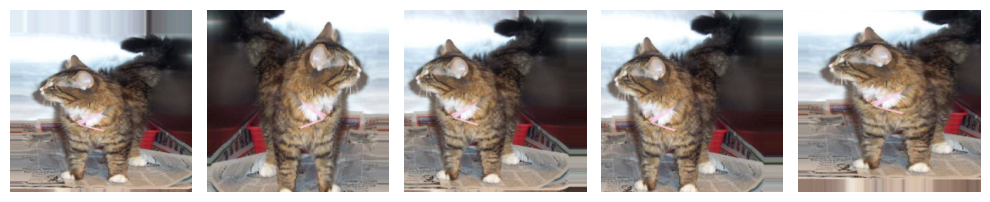

Found 1000 images belonging to 2 classes.


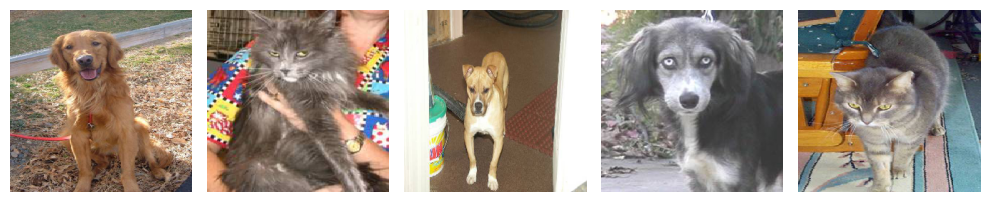

In [27]:
# 초기 파라미터 설정
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
# 훈련 데이터 생성
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# 검증 데이터 생성
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [28]:
# VGG16 모델 구현

# 입력 레이어
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))

# 첫 번째 블록
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# 두 번째 블록
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# 세 번째 블록
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# 네 번째 블록
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# 다섯 번째 블록
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# 플래튼 레이어
x = tf.keras.layers.Flatten()(x)

# 완전 연결 레이어
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# 출력 레이어
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 정의
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])

# 모델 요약 출력
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_127 (Conv2D)         (None, 256, 256, 16)      448       
                                                                 
 conv2d_128 (Conv2D)         (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_129 (Conv2D)         (None, 128, 128, 32)      4640      
                                                                 
 conv2d_130 (Conv2D)         (None, 128, 128, 32)      9248      
                                                          

Epoch 1/5
125/125 [==============================] - 19s 149ms/step - loss: 0.7113 - accuracy: 0.4930 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/5
125/125 [==============================] - 19s 149ms/step - loss: 0.6932 - accuracy: 0.4830 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
125/125 [==============================] - 19s 149ms/step - loss: 0.6933 - accuracy: 0.4810 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 4/5
125/125 [==============================] - 18s 148ms/step - loss: 0.6933 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 5/5
125/125 [==============================] - 19s 149ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5000
62/62 - 2s - loss: 0.6932 - accuracy: 0.4980 - 2s/epoch - 29ms/step
Validation accuracy: 0.4980


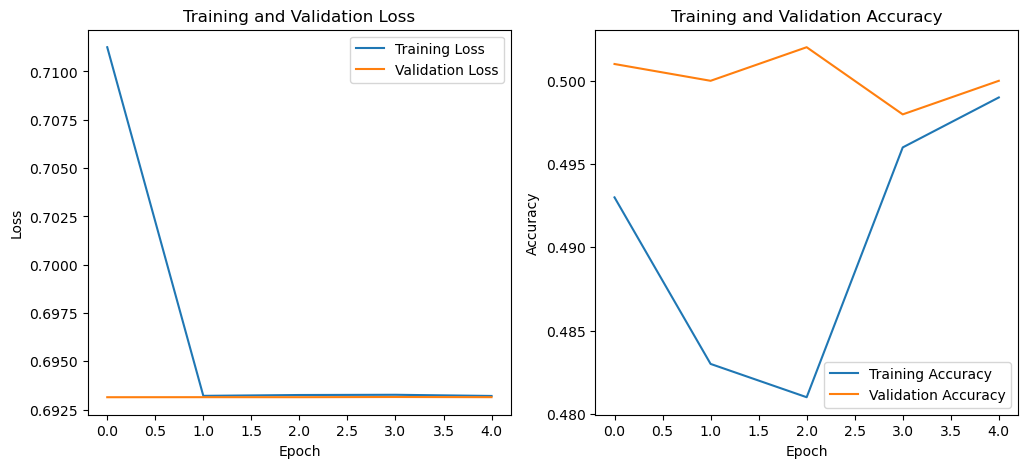

In [29]:
# 모델 컴파일
loss_function = tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(
      train_data_gen,
      steps_per_epoch=total_train // batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      validation_steps=total_val // batch_size,
      validation_freq=1)

# 모델 평가
val_loss, val_acc = model.evaluate(val_data_gen, steps=total_val // batch_size, verbose=2)
print(f"Validation accuracy: {val_acc:.4f}")

# 손실 및 정확도 그래프 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기

개선점:
배치 크기 및 에포크 수 증가,  
배치 정규화 추가, 드롭아웃 추가, 스킵 커넥션 도입,  
데이터 증강 강화, 학습률 조정 및 콜백 사용

파라미터 수 변화:  
6,144,017 -> 5,480,209

정확도 변화:  
0.4980 -> 0.7712

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_104 (Conv2D)            (None, 256, 256, 16  448         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_50 (BatchN  (None, 256, 256, 16  64         ['conv2d_104[0][0]']             
 ormaliz

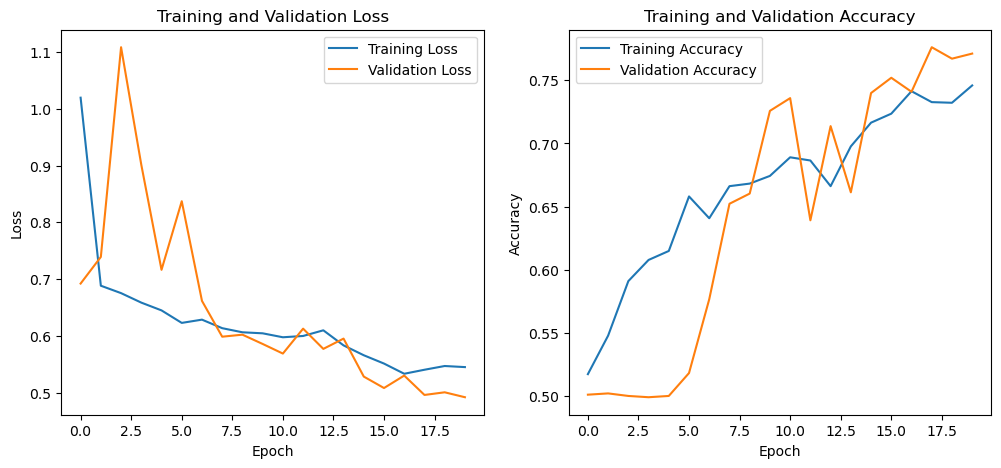

In [20]:
# 초기 파라미터 설정
batch_size = 32
epochs = 20
IMG_HEIGHT = 256
IMG_WIDTH = 256

# 데이터 증강을 위한 함수
def plot_images(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(15, 15))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 훈련 데이터 생성 (데이터 증강 포함)
image_gen_train = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# 검증 데이터 생성
image_gen_val = ImageDataGenerator(rescale=1. / 255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# 모델 구현
input_layer = tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# 첫 번째 블록
x = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
skip1 = x  # 스킵 커넥션 저장
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 두 번째 블록
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
skip2 = x  # 스킵 커넥션 저장
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 세 번째 블록
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 네 번째 블록
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 다섯 번째 블록
x = tf.keras.layers.Conv2D(256, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(256, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)

# 스킵 커넥션 연결 (다운샘플링)
skip1_down = skip1
skip1_down = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(skip1_down)
skip1_down = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(skip1_down)
skip1_down = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(skip1_down)
skip1_down = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(skip1_down)
skip1_down = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(skip1_down)

# x와 skip1_down을 결합
x = tf.keras.layers.Concatenate()([x, skip1_down])
x = tf.keras.layers.Conv2D(256, (1, 1), activation='relu')(x)

# 플래튼 레이어
x = tf.keras.layers.Flatten()(x)

# 완전 연결 레이어
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

# 출력 레이어
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 정의
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])

# 학습률 감소 콜백 설정
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 모델 요약 출력
model.summary()

# 모델 훈련
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    callbacks=[lr_reduce]
)

# 모델 평가
val_loss, val_acc = model.evaluate(val_data_gen, steps=total_val // batch_size, verbose=2)
print(f"Validation accuracy: {val_acc:.4f}")

# 손실 및 정확도 그래프 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()